# 逻辑回归预测芯片质量通过
**任务**  
1、基于chip_test.csv数据，建立逻辑回归模型（二阶边界），评估模型表现。  
2、以函数的方式求解边界曲线  
3、描绘出完整的决策边界曲线

In [1]:
#load the data
import numpy as np
import pandas as pd
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


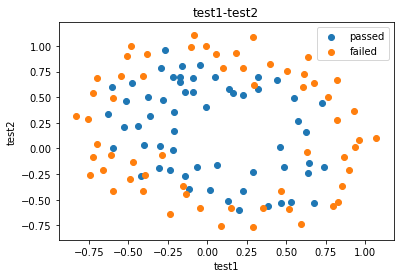

In [2]:
#add mask label
mask = data.loc[:, 'pass'] == 1
#visualize the data
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:, 'test2'][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:, 'test2'][~mask])
ax1.set_title('test1-test2')
ax1.set_xlabel('test1')
ax1.set_ylabel('test2')
ax1.legend((passed, failed), ('passed', 'failed'))

In [3]:
#define X,y
X = data.drop(['pass'], axis=1)
y = data.loc[:, 'pass']
X1 = data.loc[:, 'test1']
X2 = data.loc[:, 'test2']
#create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X1_2': X1_2,
    'X2_2': X2_2,
    'X1_X2': X1_X2
})

In [4]:
#establish new model and train it
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new, y)
#show the predicted result and its accuracy
from sklearn.metrics import accuracy_score
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y2_predict)
accuracy2

0.8135593220338984

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

->$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x2 = (-b-(b^2-4ac)^.5)/2a$

->$\theta_4 X_2^2 + (\theta_5 X_1+ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

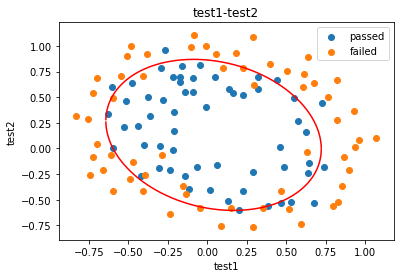

In [5]:
#求解边界函数
#X1_new=X1.sort_values()
X1_new = np.array([-0.9 + x / 10000 for x in range(0, 19000)])
theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0]
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new * X1_new
np.seterr(invalid='ignore')
X2_new_boundary_1 = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)
X2_new_boundary_2 = (-b - np.sqrt(b * b - 4 * a * c)) / (2 * a)
ax1.plot(X1_new, X2_new_boundary_1, 'r')
ax1.plot(X1_new, X2_new_boundary_2, 'r')
fig1